<a href="https://colab.research.google.com/github/Kggzzz/Multivaririate/blob/main/Exam01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#นำข้อมูล Pizza มาทำตามที่เรียน 



In [2]:
#เรียกใช้ pandas
import pandas as pd

การดึงข้อมูลมาใช้ เลือกใช้การดึงข้อมูลแบบ โหลดไฟล์ลง colab แล้วดึงออกมา 

In [3]:
data = pd.read_csv('Pizza.csv')
data.head(10)

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
5,A,14075,31.14,20.23,42.31,4.92,1.65,1.40,4.67
6,A,14082,31.21,20.97,41.34,4.71,1.58,1.77,4.63
7,A,14097,28.76,21.41,41.60,5.28,1.75,2.95,4.72
8,A,14117,28.22,20.48,45.10,5.02,1.71,1.18,4.93
9,A,14133,27.72,21.19,45.29,5.16,1.66,0.64,4.95


ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions

In [4]:
data.shape

(300, 9)

ลอง plot scatter matrix เพื่อดูการกระจายของ data ในมุมมองต่างๆ

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5bc010b8d0>,
      dtype=object)

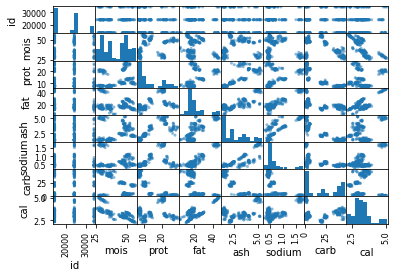

In [5]:
pd.plotting.scatter_matrix(data)

เนื่องจาก Data มี dimension มากเกินไป เราจะทดสอบดูว่า column ใด ให้ข้อมูลซ้ำกับ column อื่น แล้วลบมันออก 

โดยตัดให้เหือเพียงคอลั่มที่เป้นตัวเลขเพื่อใช้ในการคำนวณหาค่าที่ correlation 

In [6]:
newdata = data.iloc[:,1:]
newdata.head()

,id,mois,prot,fat,ash,sodium,carb,cal
0,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


ตรวจสอบว่า ระหว่าง columns มี correlation กันมากน้อยแค่ไหน ด้วย numpy

In [7]:
#เรียกใช้ numpy เนื่องจากใช้ข้อมูลที่เป็นตัวเลข 
import numpy as np

In [8]:
corr = np.corrcoef(newdata.to_numpy().T)

In [9]:
#เช็คจำนวนแถวและหลัก ของ corr
corr.shape

(8, 8)

In [10]:
#เรียก corr ที่ทำมาดู
corr

array([[ 1.        ,  0.03259505, -0.07648546, -0.00486006, -0.03407156,
        -0.01515608,  0.01496614, -0.02120862],
       [ 0.03259505,  1.        ,  0.36024768, -0.17131821,  0.26555552,
        -0.1022789 , -0.59180165, -0.76444054],
       [-0.07648546,  0.36024768,  1.        ,  0.49800167,  0.8238437 ,
         0.42912952, -0.85354226,  0.0702581 ],
       [-0.00486006, -0.17131821,  0.49800167,  1.        ,  0.79163396,
         0.93332522, -0.64023817,  0.7645671 ],
       [-0.03407156,  0.26555552,  0.8238437 ,  0.79163396,  1.        ,
         0.80812215, -0.89898837,  0.32646845],
       [-0.01515608, -0.1022789 ,  0.42912952,  0.93332522,  0.80812215,
         1.        , -0.62017634,  0.6719575 ],
       [ 0.01496614, -0.59180165, -0.85354226, -0.64023817, -0.89898837,
        -0.62017634,  1.        , -0.02348458],
       [-0.02120862, -0.76444054,  0.0702581 ,  0.7645671 ,  0.32646845,
         0.6719575 , -0.02348458,  1.        ]])

วนลูปหาค่า correlation ที่ซ้ำกัน 


In [11]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
          print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

#พบว่า correlation ไม่มีตัวซ้ำกัน จึงไม่จำเป็นตั้งตัดข้อมูลใดออก

plot กราฟ

In [12]:
data_test = data.drop(['id'],axis=1) 
data_test
#นำชื่อ column ที่เป็น 'id' ออก 
#เหลือชื่อ 'brand' ในการจัดกลุ่มข้อมูล

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,J,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [13]:
data_test2 = data.drop(['id','brand'],axis=1) 
data_test2

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [14]:
#เรียกใช้ pyplot จาก matplotlib
from matplotlib import pyplot as plt

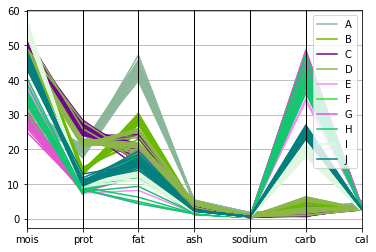

In [15]:
pd.plotting.parallel_coordinates(data_test, 'brand')
#จากการลอง plotting ทำให้รู้ว่าข้อมูล brand ที่ต้องการพอตจะดูข้อมูลยากเนื่องจากมีข้อมูลบางที่ทับซ้อนกันเราจึงต้องแก้ไข 

ปัญหาที่เกิดขึ้นคือ Dimention ของเราเยอะไป เราจึงต้องทำ PCA ในการจัดการข้อมูล

โดยทำ PCA เพื่อลดจำนวน dimention ของข้อมูล ที่มีมากเกินไป

In [16]:
#import
from sklearn.decomposition import PCA

In [17]:
#defind
pca = PCA(n_components=2)

In [18]:
new_pca = pca.fit_transform(data_test2.to_numpy()) 

In [19]:
new_pca

array([[-2.49517479e+01,  2.68116678e+01],
       [-2.46119758e+01,  2.56595634e+01],
       [-2.49384190e+01,  2.69305710e+01],
       [-2.43255609e+01,  2.35235671e+01],
       [-2.38660483e+01,  2.26528128e+01],
       [-2.42716473e+01,  2.25496261e+01],
       [-2.38806695e+01,  2.18852969e+01],
       [-2.23894923e+01,  2.39358506e+01],
       [-2.45074215e+01,  2.66033180e+01],
       [-2.50928469e+01,  2.71508163e+01],
       [-2.48185674e+01,  2.76159021e+01],
       [-2.39395254e+01,  2.75274080e+01],
       [-2.44496724e+01,  2.62221990e+01],
       [-2.28480039e+01,  2.27702098e+01],
       [-2.42812192e+01,  2.25656557e+01],
       [-2.38786302e+01,  2.39995991e+01],
       [-2.32390338e+01,  1.96576785e+01],
       [-2.36081213e+01,  1.88694931e+01],
       [-2.34833228e+01,  2.08403006e+01],
       [-2.30861647e+01,  2.25687679e+01],
       [-2.44317537e+01,  2.88343106e+01],
       [-2.39812139e+01,  2.72251577e+01],
       [-2.43513670e+01,  2.27327854e+01],
       [-2.

In [20]:
new_pca.shape

(300, 2)

In [21]:
#สร้างตัวแปร brand ให้เป็นเซ็ตของข้อมูลที่มีชื่อ brand มาเป็นข้อมูล
Brand = set(data['brand'])
Brand 

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

เราจะทำการแทนค่า text  คือชื่อ brand ที่เป็น {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'} ให้เป็นตัวเลขก็จะสามารถ plot สีของกราฟได้

In [22]:
Brand_l = list(Brand)
Brand_l.sort() #เป็นการเรียงค่า ตัวเลขจากน้อยไปมาก ตัวหนังสือจาก a-z
color_list = {}
num = 0
for each_b in Brand:
   if each_b not in color_list:
#สร้าง dictionaly เพื่อสร้างเก็บข้อมูล โดยการวนลูป
       color_list[each_b] = num
       num += 1

In [23]:
color_list #จากผล ตอนแรก brand มีชื่อตัวหนังสือที่เรียงกันอยู่แล้ว ดังนั้นพอใส่ .sort() ผลจึงเหมือนเดิม
#จะเห็นว่าชื่อ brand จะถูกเปลี่ยนให้เป็นเลขต่างๆ ตามผล out put นี้

{'A': 3,
 'B': 0,
 'C': 9,
 'D': 2,
 'E': 8,
 'F': 6,
 'G': 5,
 'H': 7,
 'I': 1,
 'J': 4}

จากนั้นแทนค่า text ที่เราได้ใน Dictionary ด้วยตัวเลขที่เรากำหนดมา

In [24]:
data2 = data_test.replace(color_list) #replacee คือการ

In [25]:
data2

,brand,mois,prot,fat,ash,sodium,carb,cal
0,3,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,3,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,3,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,3,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,4,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,4,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,4,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,4,47.60,10.43,15.18,2.32,0.56,24.47,2.76


ลอง plot scatter จากข้อมูลโดยแบ่งตาม brand

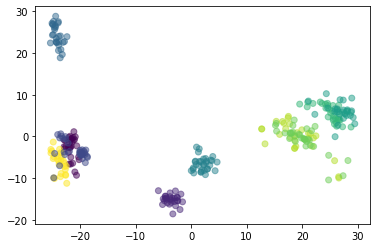

In [26]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = data2['brand'],alpha=0.5)
#ดูการกระจายของข้อมูล

ทดลอง เปรียบเทียบ brand  A และ B

In [27]:
test1 = data2[(data2['brand']==5) | (data2['brand']==9)]  #ดูค่าจาก colorlist
test1

,brand,mois,prot,fat,ash,sodium,carb,cal
60,9,48.40,26.05,21.40,3.44,0.50,0.71,3.00
61,9,48.69,28.48,17.37,3.53,0.43,1.93,2.78
62,9,48.88,25.23,20.89,3.22,0.47,1.78,2.96
63,9,48.97,25.63,19.28,3.48,0.55,2.64,2.87
64,9,48.84,23.98,23.37,3.00,0.52,0.81,3.09
65,9,49.73,25.65,19.98,2.51,0.52,2.13,2.91
66,9,50.18,28.30,15.79,3.47,0.45,2.26,2.64
67,9,48.15,27.98,18.69,3.58,0.48,1.70,2.87
68,9,49.72,27.31,16.89,3.08,0.25,3.00,2.73
69,9,51.59,26.24,16.41,3.61,0.60,2.15,2.61


จากนั้นนำตารางข้อมุลที่เปรียบเทียบแบร์น A และ B มาลอง plot โดยในการพอตต้องการเปรียบเทียบเพีงแค่ 2 dimention 

In [28]:
pca2 = PCA(n_components=2) #ต้องการแค่ 2 dimention
new_pca2 = pca2.fit_transform(test1.iloc[:,1:].to_numpy())

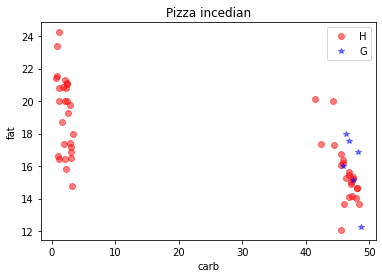

In [29]:
plt.plot(test1['carb'][:50],test1['fat'][:50],'or',alpha=0.5,label = 'H')
plt.plot(test1['carb'][50:100],test1['fat'][50:100],'*b',alpha=0.5,label = 'G')
plt.legend()
plt.title('Pizza incedian'); #ตั้งชื่อกราฟโดยใช้ .title
plt.xlabel('carb'); ##ชื่อแกน x (ใส่ ; เพื่อไม่ให้ตัวหนังสือทับกับกราฟ ต้องใส่ลงไปหลังคำสั่งต่างๆ)
plt.ylabel('fat'); ##ชื่อแกน y

Principle components เป็นตัวแทนของข้อมูลได้ว่าดีแค่ไหน

In [30]:
pca2.explained_variance_ratio_

array([0.98940018, 0.00878955])

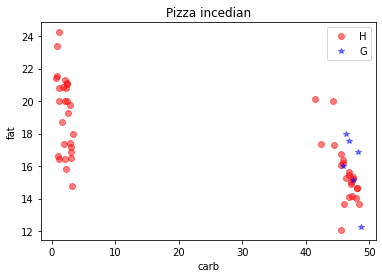

In [31]:
plt.plot(test1['carb'][:50],test1['fat'][:50],'or',alpha=0.5,label = 'H')
plt.plot(test1['carb'][50:100],test1['fat'][50:100],'*b',alpha=0.5,label = 'G')
plt.legend()
plt.title('Pizza incedian'); #ตั้งชื่อกราฟโดยใช้ .title
plt.xlabel('carb'); ##ชื่อแกน x (ใส่ ; เพื่อไม่ให้ตัวหนังสือทับกับกราฟ ต้องใส่ลงไปหลังคำสั่งต่างๆ)
plt.ylabel('fat'); ##ชื่อแกน y

จากการหา component ที่เหมาะสมที่ถูกเลือกมาใช้จะครอบคลุม variance  ซึ่งจากที่เปรียบเทียบ car กับ fat ระหว่างพิซซ่า Brand H VS Brand G แล้วจะได้ว่า  component ของ Car เป็น 93.671711% และ fat เป็น 6.174895% ซึ่งบวกกันได้ 99.84% จึงสามารถอธิบายได้ครอบคลุม

#ดึงข้อมูล nnbd มาเปรียบเทียบสินค้าใหม่ให้ไม่ซื้อเดิม

In [32]:
nn_data = pd.read_csv('nndb_flat.csv')
nn_data.head(10)

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
5,1006,Dairy and Egg Products,"CHEESE,BRIE","Cheese, brie",NaN,NaN,NaN,334.0,20.75,27.68,0.45,0.45,0.0,174.0,0.235,1.65,0.0,0.24,65.0,0.380,0.520,0.070,184.0,0.019,0.50,20.0,0.034,188.0,14.5,2.38,0.193333,0.138235,0.687500,0.0,0.016000,0.1625,0.023750,0.400000,0.058333,0.153333,0.000021,0.047619,0.268571,0.263636,0.216364
6,1007,Dairy and Egg Products,"CHEESE,CAMEMBERT","Cheese, camembert",NaN,NaN,NaN,300.0,19.80,24.26,0.46,0.46,0.0,241.0,0.227,1.30,0.0,0.21,62.0,0.630,0.488,0.028,388.0,0.021,0.33,20.0,0.038,347.0,14.5,2.38,0.267778,0.133529,0.541667,0.0,0.014000,0.1550,0.039375,0.375385,0.023333,0.323333,0.000023,0.047619,0.495714,0.263636,0.216364
7,1008,Dairy and Egg Products,"CHEESE,CARAWAY","Cheese, caraway",NaN,NaN,NaN,376.0,25.18,29.20,3.06,0.00,0.0,271.0,0.074,0.27,0.0,0.00,18.0,0.180,0.450,0.031,673.0,0.024,0.64,22.0,0.021,490.0,14.5,2.94,0.301111,0.043529,0.112500,0.0,0.000000,0.0450,0.011250,0.346154,0.025833,0.560833,0.000027,0.052381,0.700000,0.263636,0.267273
8,1009,Dairy and Egg Products,"CHEESE,CHEDDAR","Cheese, cheddar",NaN,NaN,NaN,406.0,24.04,33.82,1.33,0.28,0.0,263.0,0.049,0.88,0.0,0.78,26.0,0.039,0.434,0.027,675.0,0.056,0.16,27.0,0.033,473.0,28.3,3.43,0.292222,0.028824,0.366667,0.0,0.052000,0.0650,0.002437,0.333846,0.022500,0.562500,0.000062,0.064286,0.675714,0.514545,0.311818
9,1010,Dairy and Egg Products,"CHEESE,CHESHIRE","Cheese, cheshire",NaN,NaN,NaN,387.0,23.37,30.60,4.78,0.00,0.0,233.0,0.074,0.83,0.0,0.00,18.0,0.080,0.293,0.046,643.0,0.042,0.21,21.0,0.012,464.0,14.5,2.79,0.258889,0.043529,0.345833,0.0,0.000000,0.0450,0.005000,0.225385,0.038333,0.535833,0.000047,0.050000,0.662857,0.263636,0.253636


ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions

In [33]:
nn_data.shape

(8618, 45)

ลอง plot scatter matrix เพื่อดูการกระจายของ data ในมุมมองต่างๆ

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ba0930d50>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

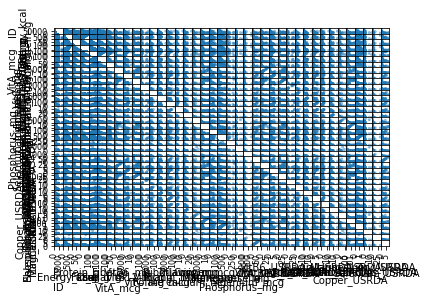

In [34]:
pd.plotting.scatter_matrix(nn_data)

จากภาพจะเห็นได้ว่าข้อมูลมีการทับซื้อนกันเยอะมาก ทำให้สามารถอ่านค่าในกราฟ กราฟนี้ไดั

เนื่องจาก Data มี dimension มากเกินไป เราจะทดสอบดูว่า column ใด ให้ข้อมูลซ้ำกับ column อื่น แล้วลบมันออก

In [61]:
#เลือกมาทำต่อเฉพาะข้อมูลที่เป็นตัวเลข
new_nndata = nn_data.iloc[:,7:]
new_nndata.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


```import numpy as np```

ดึงฟังก์ชั่น numpy ที่ทำงานเกี่ยวกับตัวเลขมา  

In [62]:
corr2 = np.corrcoef(new_nndata.to_numpy().T)

In [63]:
corr2.shape

(38, 38)

In [64]:
corr2

array([[1.        , 0.11030203, 0.80679472, ..., 0.19518065, 0.05667274,
        0.11276635],
       [0.11030203, 1.        , 0.05471538, ..., 0.44460761, 0.37836917,
        0.41631538],
       [0.80679472, 0.05471538, 1.        , ..., 0.06608644, 0.03755914,
        0.02826352],
       ...,
       [0.19518065, 0.44460761, 0.06608644, ..., 1.        , 0.22368557,
        0.26657694],
       [0.05667274, 0.37836917, 0.03755914, ..., 0.22368557, 1.        ,
        0.20529859],
       [0.11276635, 0.41631538, 0.02826352, ..., 0.26657694, 0.20529859,
        1.        ]])

สร้าง loop เพื่อรันค่าที่เป็น correlation = 1 ว่ามี row ไหนและ column อะไร

In [65]:
for i in range(corr2.shape[0]):
    for j in range(corr2.shape[1]):
        if (i !=j) and (corr2[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr2[i,j]}')

row = 10 column = 27 corrcoef = 1.0
row = 12 column = 29 corrcoef = 1.0
row = 13 column = 30 corrcoef = 1.0
row = 14 column = 31 corrcoef = 1.0
row = 18 column = 34 corrcoef = 1.0
row = 20 column = 35 corrcoef = 1.0
row = 22 column = 37 corrcoef = 1.0
row = 27 column = 10 corrcoef = 1.0
row = 29 column = 12 corrcoef = 1.0
row = 30 column = 13 corrcoef = 1.0
row = 31 column = 14 corrcoef = 1.0
row = 34 column = 18 corrcoef = 1.0
row = 35 column = 20 corrcoef = 1.0
row = 37 column = 22 corrcoef = 1.0


```from matplotlib import pyplot as plt```

ดึงฟังก์ชั่น matplotlib จาก pyplot

ลอง plot กราฟที่มี data ที่มี correlation เป็น 1

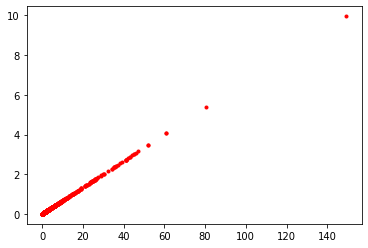

In [70]:
plt.plot(new_nndata.iloc[:,10],new_nndata.iloc[:,27],'r.')

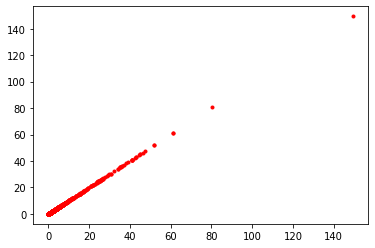

In [71]:
#โดยกราฟที่มี correlation = 1 จะมีกราฟที่หน้าตาเหมือนกับ data ที่อยู่จุดเดียวกันมา plot 
plt.plot(new_nndata.iloc[:,10],new_nndata.iloc[:,10],'r.')

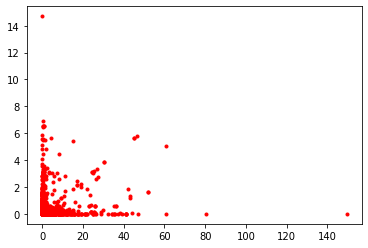

In [72]:
#กราฟที่มี data ที่มี correlation เป็นค่าอื่นๆ
plt.plot(new_nndata.iloc[:,10],new_nndata.iloc[:,28],'r.')

เมื่อเราได้ correlation ที่ได้ เราจะรู้ว่าตารางไหนซ้ำ เราก็จะกำจัดตารางที่ซ้ำออก

In [73]:
new_nndata.columns
#จะเห็นได้ว่า '_USRDA' เป็น columns ที่ซ้ำและเราต้องการจะลบ

Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],
      dtype='object')

In [74]:
new_nndata.columns[new_nndata.columns.str.contains('_USRDA')]
#เป็นการหา columns ที่มี _USRDA โดยถ้ามีจะเป็น ture ไม่มีจะเป็น false

Index(['VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA',
       'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA',
       'Calcium_USRDA', 'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA',
       'Selenium_USRDA', 'Zinc_USRDA'],
      dtype='object')

In [75]:
new_nndata.columns[new_nndata.columns.str.contains('_USRDA')].values
#เมื่อ .valuse ก็จะเอาเฉพาะ columns ที่ตรงตามเงื่อนไข คือ ture

array(['VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA',
       'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA',
       'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA',
       'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'], dtype=object)

In [76]:
new_nndata.drop(new_nndata.columns[new_nndata.columns.str.contains('_USRDA')].values, axis=1) 
#การลบ columns ต้องใส่ asix = 1 ถ้าลบ row asix = 0
#เป็นการลบ columns ที่มีชื่อข้างหลังคือ _USRDA

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,2.38,15.0,3.300,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,0.00,20.0,1.076,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.00,0.0,0.100,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,5.00,6.0,1.400,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00


เตรียมตารางข้อมูลเพื่อนำไปใช้ใน PCA 

In [77]:
#drop column ที่มี correletion = 1
newdata_dropped = new_nndata.drop(['VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
newdata_dropped 

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [78]:
#drop data ที่ไม่ต้องการออกไป ให้เลือกแต่ column ที่ต้องการใช้
data_dropped = nn_data.drop(['ID','ShortDescrip','Descrip','CommonName','MfgName','ScientificName','VitE_mg','Niacin_mg','Riboflavin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
data_dropped

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,Dairy and Egg Products,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,Dairy and Egg Products,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,Dairy and Egg Products,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,Finfish and Shellfish Products,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,Finfish and Shellfish Products,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,Sweets,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.0,13.0,0.020,3.60,0.000,0.7,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,Finfish and Shellfish Products,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [79]:
#drop data ที่ไม่ต้องการออกไป ให้เลือกแต่ column ที่ต้องการใช้ โดยจะนำไปลอง plot ดูค่า
data_newvy = nn_data.drop(['ID','ShortDescrip','Descrip','CommonName','MfgName','ScientificName','VitC_mg','Niacin_mg','Thiamin_mg','Magnesium_mg','Phosphorus_mg','Zinc_mg'], axis=1)
data_newvy.head(10)

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitE_mg,Folate_mcg,Riboflavin_mg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,2.32,3.0,0.034,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,2.32,3.0,0.034,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,Dairy and Egg Products,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,2.80,0.0,0.005,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,Dairy and Egg Products,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.25,36.0,0.382,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,Dairy and Egg Products,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.26,20.0,0.351,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
5,Dairy and Egg Products,334.0,20.75,27.68,0.45,0.45,0.0,174.0,0.235,1.65,0.24,65.0,0.520,184.0,0.019,0.50,0.034,14.5,0.193333,0.138235,0.687500,0.0,0.016000,0.1625,0.023750,0.400000,0.058333,0.153333,0.000021,0.047619,0.268571,0.263636,0.216364
6,Dairy and Egg Products,300.0,19.80,24.26,0.46,0.46,0.0,241.0,0.227,1.30,0.21,62.0,0.488,388.0,0.021,0.33,0.038,14.5,0.267778,0.133529,0.541667,0.0,0.014000,0.1550,0.039375,0.375385,0.023333,0.323333,0.000023,0.047619,0.495714,0.263636,0.216364
7,Dairy and Egg Products,376.0,25.18,29.20,3.06,0.00,0.0,271.0,0.074,0.27,0.00,18.0,0.450,673.0,0.024,0.64,0.021,14.5,0.301111,0.043529,0.112500,0.0,0.000000,0.0450,0.011250,0.346154,0.025833,0.560833,0.000027,0.052381,0.700000,0.263636,0.267273
8,Dairy and Egg Products,406.0,24.04,33.82,1.33,0.28,0.0,263.0,0.049,0.88,0.78,26.0,0.434,675.0,0.056,0.16,0.033,28.3,0.292222,0.028824,0.366667,0.0,0.052000,0.0650,0.002437,0.333846,0.022500,0.562500,0.000062,0.064286,0.675714,0.514545,0.311818
9,Dairy and Egg Products,387.0,23.37,30.60,4.78,0.00,0.0,233.0,0.074,0.83,0.00,18.0,0.293,643.0,0.042,0.21,0.012,14.5,0.258889,0.043529,0.345833,0.0,0.000000,0.0450,0.005000,0.225385,0.038333,0.535833,0.000047,0.050000,0.662857,0.263636,0.253636


ลอง plot ข้อมูลทั้งหมดดู 

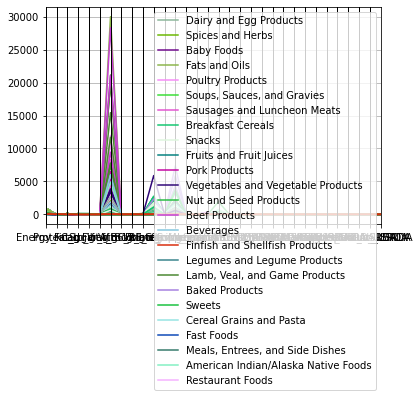

In [80]:
pd.plotting.parallel_coordinates(data_newvy, 'FoodGroup')
#พอมีข้อมูล food group มากๆ จะทำให้ดูข้อมูลยาก

###ปัญหาที่เกิดขึ้นคือ Dimention ของเราเยอะไป เราจึงต้องทำ PCA ในการจัดการข้อมูล

โดยทำ PCA เพื่อลดจำนวน dimention ของข้อมูล ที่มีมากเกินไป

```from sklearn.decomposition import PCA``` #import

```pca = PCA(n_components=2)``` #defind

In [81]:
New_pca = pca.fit_transform(newdata_dropped.to_numpy()) 

In [82]:
New_pca.shape

(8618, 2)

In [84]:
#เริ่มเอาค่าข้างใน columns มาก่อน เพื่อจะนำไป loop เปลี่ยนค่า text ให้เป็น numpy
FG = set(nn_data['FoodGroup'])
FG

{'American Indian/Alaska Native Foods',
 'Baby Foods',
 'Baked Products',
 'Beef Products',
 'Beverages',
 'Breakfast Cereals',
 'Cereal Grains and Pasta',
 'Dairy and Egg Products',
 'Fast Foods',
 'Fats and Oils',
 'Finfish and Shellfish Products',
 'Fruits and Fruit Juices',
 'Lamb, Veal, and Game Products',
 'Legumes and Legume Products',
 'Meals, Entrees, and Side Dishes',
 'Nut and Seed Products',
 'Pork Products',
 'Poultry Products',
 'Restaurant Foods',
 'Sausages and Luncheon Meats',
 'Snacks',
 'Soups, Sauces, and Gravies',
 'Spices and Herbs',
 'Sweets',
 'Vegetables and Vegetable Products'}

In [85]:
#สร้าง loop 
FG_l = list(FG)
FG_l.sort() #เป็นการเรียงค่า ตัวเลขจากน้อยไปมาก ตัวหนังสือจาก a-z
color_list2 = {}
num = 0
for each_fg in FG_l:
   if each_fg not in color_list2:
#สร้าง dictionaly เพื่อสร้างเก็บข้อมูล โดยการวนลูป
       color_list2[each_fg] = num
       num += 1

In [86]:
color_list2 #เช็คค่าที่ loop เปลี่ยน text ว่าเป็นตัวเลขหรือไม่ 

{'American Indian/Alaska Native Foods': 0,
 'Baby Foods': 1,
 'Baked Products': 2,
 'Beef Products': 3,
 'Beverages': 4,
 'Breakfast Cereals': 5,
 'Cereal Grains and Pasta': 6,
 'Dairy and Egg Products': 7,
 'Fast Foods': 8,
 'Fats and Oils': 9,
 'Finfish and Shellfish Products': 10,
 'Fruits and Fruit Juices': 11,
 'Lamb, Veal, and Game Products': 12,
 'Legumes and Legume Products': 13,
 'Meals, Entrees, and Side Dishes': 14,
 'Nut and Seed Products': 15,
 'Pork Products': 16,
 'Poultry Products': 17,
 'Restaurant Foods': 18,
 'Sausages and Luncheon Meats': 19,
 'Snacks': 20,
 'Soups, Sauces, and Gravies': 21,
 'Spices and Herbs': 22,
 'Sweets': 23,
 'Vegetables and Vegetable Products': 24}

In [87]:
#แทนค่า text ใน Dictionary ด้วยตัวเลขที่เรากำหนด
data_dropped2 = data_dropped.replace(color_list2)
data_dropped2.head(10)

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,3.0,24.0,0.000,0.02,0.000,1.0,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,3.0,24.0,0.016,0.16,0.004,1.0,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,7,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,0.0,4.0,0.001,0.00,0.000,0.0,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,7,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,36.0,528.0,0.040,0.31,0.009,14.5,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,7,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,20.0,674.0,0.024,0.43,0.012,14.5,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
5,7,334.0,20.75,27.68,0.45,0.45,0.0,174.0,0.235,1.65,0.0,65.0,184.0,0.019,0.50,0.034,14.5,0.193333,0.138235,0.687500,0.0,0.016000,0.1625,0.023750,0.400000,0.058333,0.153333,0.000021,0.047619,0.268571,0.263636,0.216364
6,7,300.0,19.80,24.26,0.46,0.46,0.0,241.0,0.227,1.30,0.0,62.0,388.0,0.021,0.33,0.038,14.5,0.267778,0.133529,0.541667,0.0,0.014000,0.1550,0.039375,0.375385,0.023333,0.323333,0.000023,0.047619,0.495714,0.263636,0.216364
7,7,376.0,25.18,29.20,3.06,0.00,0.0,271.0,0.074,0.27,0.0,18.0,673.0,0.024,0.64,0.021,14.5,0.301111,0.043529,0.112500,0.0,0.000000,0.0450,0.011250,0.346154,0.025833,0.560833,0.000027,0.052381,0.700000,0.263636,0.267273
8,7,406.0,24.04,33.82,1.33,0.28,0.0,263.0,0.049,0.88,0.0,26.0,675.0,0.056,0.16,0.033,28.3,0.292222,0.028824,0.366667,0.0,0.052000,0.0650,0.002437,0.333846,0.022500,0.562500,0.000062,0.064286,0.675714,0.514545,0.311818
9,7,387.0,23.37,30.60,4.78,0.00,0.0,233.0,0.074,0.83,0.0,18.0,643.0,0.042,0.21,0.012,14.5,0.258889,0.043529,0.345833,0.0,0.000000,0.0450,0.005000,0.225385,0.038333,0.535833,0.000047,0.050000,0.662857,0.263636,0.253636


เมื่อแทนค่าที่เป้น text ให้เป็นตัวเลขก็จะสามารถ plot สีของกราฟได้

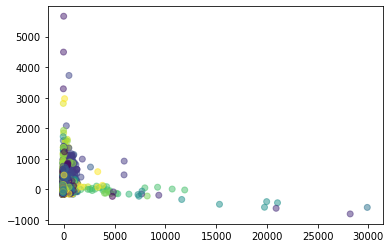

In [88]:
#ลอง plot ค่าปกติมาดูก่อน จะพบว่าค่าจาก foodgroup มีเยอะมากไม่สามารถอ่านค่าได้
plt.scatter(New_pca[:,0],New_pca[:,1],c = data_dropped2['FoodGroup'],alpha=0.5)

###ทำการทดลอง เปรียบเทียบค่าสารอาหารอื่นๆใน foodgroup

In [90]:
color_list2 #ดูสารอาหารว่ามีอะไรบ้างใน foodgroup

{'American Indian/Alaska Native Foods': 0,
 'Baby Foods': 1,
 'Baked Products': 2,
 'Beef Products': 3,
 'Beverages': 4,
 'Breakfast Cereals': 5,
 'Cereal Grains and Pasta': 6,
 'Dairy and Egg Products': 7,
 'Fast Foods': 8,
 'Fats and Oils': 9,
 'Finfish and Shellfish Products': 10,
 'Fruits and Fruit Juices': 11,
 'Lamb, Veal, and Game Products': 12,
 'Legumes and Legume Products': 13,
 'Meals, Entrees, and Side Dishes': 14,
 'Nut and Seed Products': 15,
 'Pork Products': 16,
 'Poultry Products': 17,
 'Restaurant Foods': 18,
 'Sausages and Luncheon Meats': 19,
 'Snacks': 20,
 'Soups, Sauces, and Gravies': 21,
 'Spices and Herbs': 22,
 'Sweets': 23,
 'Vegetables and Vegetable Products': 24}

In [113]:
#สร้างตารางที่มีสารอาหาร 'Finfish and Shellfish Products' และ 'Lamb, Veal, and Game Products'
Fin = data_dropped2[(data_dropped2['FoodGroup']==10) | (data_dropped2['FoodGroup']==12)]  ## ใช้  | และ  &  แทน  or  และ  and  ใน pandas
Fin

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,Folate_mcg,Calcium_mg,Copper_mcg,Iron_mg,Manganese_mg,Selenium_mcg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
4455,10,131.0,20.35,4.84,0.00,0.0,0.0,15.0,0.143,0.62,0.0,9.0,147.0,0.211,3.25,0.070,36.5,0.016667,0.084118,0.258333,0.000000,0.038000,0.0225,0.876500,0.196923,0.045833,0.122500,0.000234,0.097619,0.248571,0.663636,0.156364
4456,10,210.0,28.89,9.71,0.00,0.0,0.0,12.0,0.203,0.88,0.0,13.0,232.0,0.339,4.63,0.100,68.1,0.013333,0.119412,0.366667,0.000000,0.222000,0.0325,1.243937,0.279231,0.065000,0.193333,0.000377,0.164286,0.360000,1.238182,0.221818
4457,10,114.0,18.86,3.69,0.00,0.0,0.0,30.0,0.120,2.00,2.0,15.0,80.0,0.093,1.49,0.889,12.6,0.033333,0.070588,0.833333,0.022222,0.000000,0.0375,0.078125,0.056923,0.062500,0.066667,0.000103,0.071429,0.285714,0.229091,0.059091
4458,10,97.0,17.73,2.33,0.00,0.0,0.0,27.0,0.300,3.82,0.0,9.0,15.0,0.031,0.84,0.015,36.5,0.030000,0.176471,1.591667,0.000000,0.000000,0.0225,0.131250,0.023077,0.083333,0.012500,0.000034,0.095238,0.282857,0.663636,0.036364
4459,10,124.0,20.04,4.24,0.00,0.0,0.0,120.0,0.402,5.39,0.0,2.0,7.0,0.053,0.48,0.021,36.5,0.133333,0.236471,2.245833,0.000000,0.000000,0.0050,0.371875,0.061538,0.048333,0.005833,0.000059,0.078571,0.324286,0.663636,0.073636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8612,10,73.0,16.40,0.30,0.00,0.0,0.0,15.0,0.120,0.40,0.0,15.0,18.0,0.250,1.50,0.000,14.1,0.016667,0.070588,0.166667,0.000000,0.066667,0.0375,0.075000,0.192308,0.116667,0.015000,0.000278,0.047619,0.210000,0.256364,0.090909
8613,10,305.0,18.50,25.10,0.00,0.0,0.0,47.0,0.410,12.00,0.0,15.0,66.0,0.100,1.40,0.000,73.4,0.052222,0.241176,5.000000,0.000000,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,10,111.0,20.54,0.84,5.41,0.0,0.0,2.0,0.112,2.15,0.0,20.0,10.0,0.033,0.58,0.029,21.7,0.002222,0.065882,0.895833,0.000000,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8616,10,90.0,16.10,1.40,2.00,0.0,0.0,30.0,0.130,0.50,0.0,6.0,10.0,0.400,3.50,0.000,27.4,0.033333,0.076471,0.208333,0.000000,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [114]:
pca3 = PCA(n_components=2) #ต้องการแค่ 2 dimention
new_pca2 = pca.fit_transform(Fin.iloc[:,1:].to_numpy())

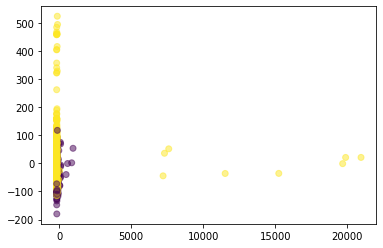

In [116]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = Fin['FoodGroup'],alpha=0.5)

In [118]:
#ลองแยกค่าสารอาหารมา plot 
Finfish_pca = pca.transform(Fin[Fin['FoodGroup']==10].iloc[:,1:].to_numpy())
Lamb_pca = pca.transform(Fin[Fin['FoodGroup']==12].iloc[:,1:].to_numpy())

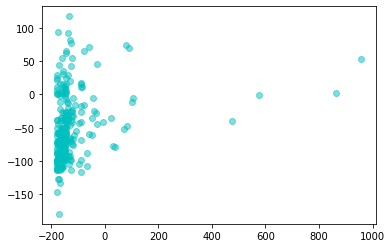

In [121]:
plt.scatter(Finfish_pca[:,0],Finfish_pca[:,1],c ='c',alpha=0.5)

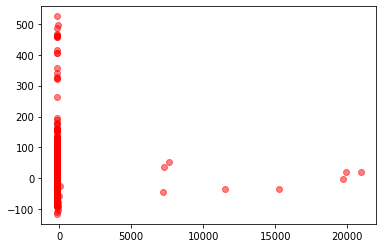

In [122]:
plt.scatter(Lamb_pca[:,0],Lamb_pca[:,1],c = 'r',alpha=0.5)

##กราฟเปรียบเทียบ สารอาหารใน 'Finfish and Shellfish Products' และ 'Lamb, Veal, and Game Products'

###Principle components เป็นตัวแทนของข้อมูลได้ดีแค่ไหน

In [115]:
pca.explained_variance_ratio_

array([0.99534945, 0.00360115])

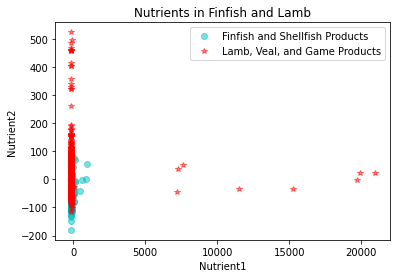

In [120]:
plt.plot(Finfish_pca[:,0],Finfish_pca[:,1],'oc',alpha=0.5, label = 'Finfish and Shellfish Products') 
plt.plot(Lamb_pca[:,0],Lamb_pca[:,1],'*r',alpha=0.5, label = 'Lamb, Veal, and Game Products')
plt.legend()
plt.title('Nutrients in Finfish and Lamb'); 
plt.xlabel('Nutrient1'); 
plt.ylabel('Nutrient2'); 

จากการหา component ที่เหมาะสมที่ถูกเลือกมาใช้จะครอบคลุม variance  ซึ่งจากที่เปรียบเทียบ Nutrient1 กับ Nutrient2 ระหว่างอาหาร Finfish and Shellfish Products กับ 'Lamb, Veal, and Game Products' แล้วจะได้ว่า  component ของ Nutrient1 เป็น 99.534945% และ Nutrient2 เป็น 0.360115% ซึ่งบวกกันได้ 99.89% จึงสามารถอธิบายได้ครอบคลุม